In [165]:
import numpy as np
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [171]:
df = pd.read_csv('../hackerrank_data/shots.csv')
df = df[df.shot_y<=40]
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9675 entries, 0 to 9999
Data columns (total 10 columns):
shot_x                      9675 non-null float64
shot_y                      9675 non-null float64
shooter_velocity_ft_sec     9675 non-null float64
shooter_velocity_angle      9675 non-null float64
dribbles_before             9675 non-null int64
made                        9675 non-null int64
defender_distance           9675 non-null float64
defender_angle              9675 non-null float64
defender_velocity_ft_sec    9675 non-null float64
defender_velocity_angle     9675 non-null float64
dtypes: float64(8), int64(2)
memory usage: 831.4 KB
None


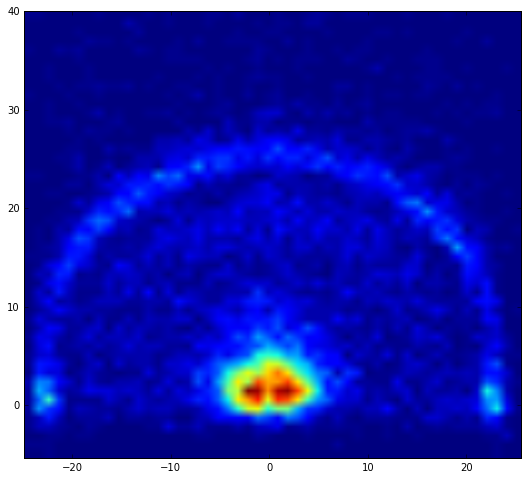

In [172]:
heatmap, xedges, yedges = np.histogram2d(df.shot_x, df.shot_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

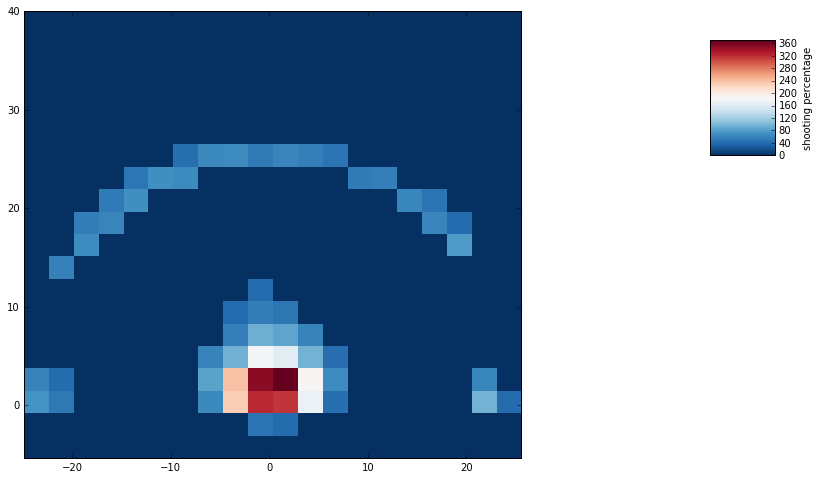

In [173]:
bin_num = 20

d = stats.binned_statistic_2d(df.shot_x, df.shot_y, df.made, statistic='count', bins=bin_num)
d = np.array([np.where(np.array(d[0])>40, np.array(d[0]), 0), np.array(d[1]), np.array(d[2])])

extent = [d[1][0], d[1][-1], d[2][0], d[2][-1]]
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(d[0].T, cmap='RdBu_r', extent=extent, interpolation='nearest', origin='lower')

cbar_ax = fig.add_axes([0.85, 0.65, 0.05, 0.2])
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_label('shooting percentage')
plt.show()

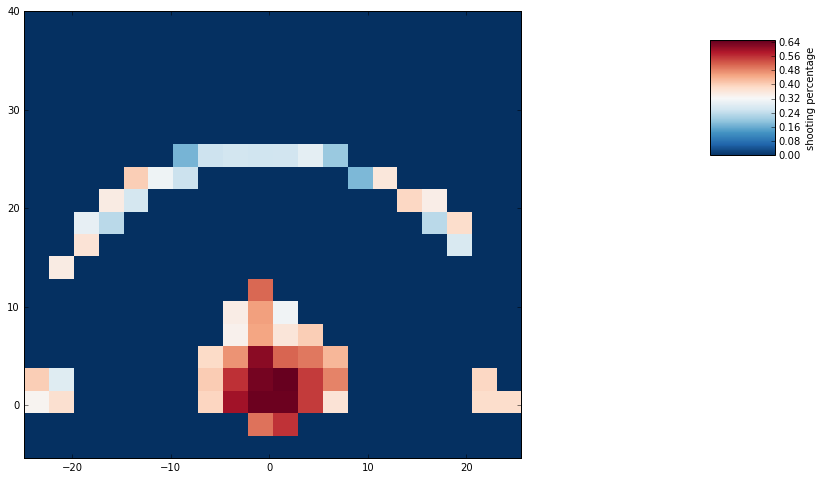

In [175]:
bin_num = 20
d_mean = stats.binned_statistic_2d(df.shot_x, df.shot_y, df.made, statistic='mean', bins=bin_num)
d_count = stats.binned_statistic_2d(df.shot_x, df.shot_y, df.made, statistic='count', bins=bin_num)
d = np.array([np.where(np.array(d_count[0])>40, np.array(d_mean[0]), 0), np.array(d_mean[1]), np.array(d_mean[2])])

extent = [d[1][0], d[1][-1], d[2][0], d[2][-1]]
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(d[0].T, cmap='RdBu_r', extent=extent, interpolation='nearest', origin='lower')

cbar_ax = fig.add_axes([0.85, 0.65, 0.05, 0.2])
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_label('shooting percentage')

plt.savefig('shooting_percentage.png')
plt.show()

Is there a significant difference in the shooting percentage between the top of the key and the wings?

Why might this be?
* Worse shooters
* Farther away
* Defense structure

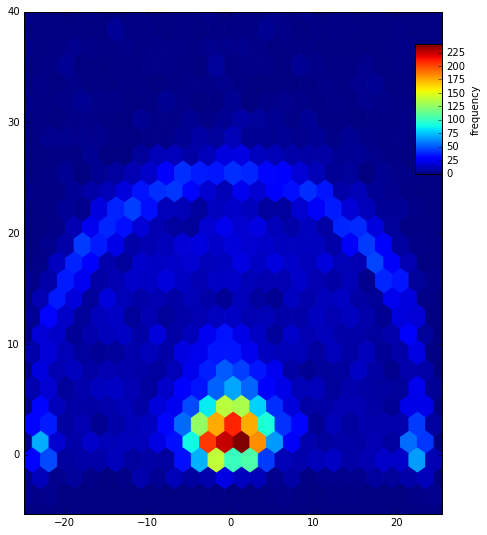

In [158]:
df = df[df.shot_y<=40]

fig = plt.figure(figsize=(7.5,9))
ax = fig.add_subplot(1,1,1)
im = ax.hexbin(df.shot_x, df.shot_y, gridsize=25, cmap=CM.jet, bins=None)

cbar_ax = fig.add_axes([0.85, 0.65, 0.05, 0.2])
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_label('frequency')
plt.show()

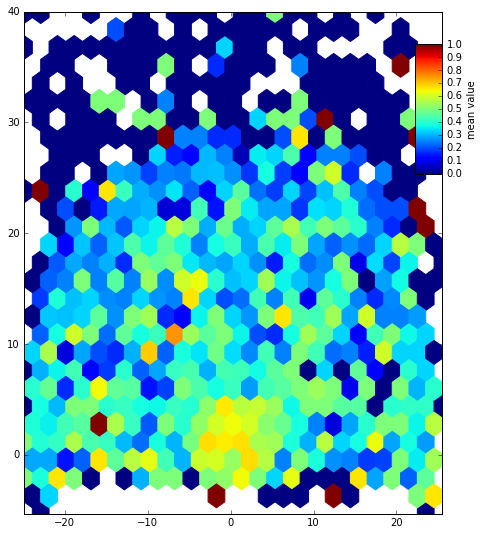

In [78]:
df = df[df.shot_y<=40]

fig = plt.figure(figsize=(7.5,9))
ax = fig.add_subplot(1,1,1)
im = ax.hexbin(df.shot_x, df.shot_y, C=df.made, gridsize=25, cmap=CM.jet, bins=None, reduce_C_function = np.mean)

cbar_ax = fig.add_axes([0.85, 0.65, 0.05, 0.2])
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_label('mean value')
plt.show()

In [ ]:


df = df[df.shot_y<=40]

fig = plt.figure(figsize=(7.5,9))
ax = fig.add_subplot(1,1,1)
num_arr = np.where(ax.hexbin(df.shot_x, df.shot_y, gridsize=25, cmap=CM.jet, bins=None).get_array()>=50, 1, 0)

plt.cla()
ax = fig.add_subplot(1,1,1)
im = ax.hexbin(df.shot_x, df.shot_y, C=df.made, gridsize=25, cmap=CM.jet, bins=None, reduce_C_function = np.mean)

cbar_ax = fig.add_axes([0.85, 0.65, 0.05, 0.2])
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_label('mean value')
plt.show()